<html>
<body>
<h1 style="background-color: #022851;"><center>
    <br><font size="+3.5">
    <font color=#FFBF00><b>Funding Distribution Analysis</b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00><b>Preliminary</b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00><b>Name:</b> Kelsey Craig </font> <br>
    <font color=#FFBF00><b>Last Edited:</b> December 5, 2024 </font>
   </font> 
    </center>
</h1>
</body>
</html>


## Get Started in ArcGIS Pro

* Open a new ArcGIS Pro .arpx project file called "XARXX_FundingDistribution"

* Connect to the folder where the GGRF Project Map geodatabase is located
    * Right Click “Folders” in the catalog pane
    * Select “Add Folder Connection”
    * Add Polygon, Point, and Line features to the map project.
   

## Open the Notebook in ArcGIS Pro

* On the Insert tab in the command ribbon, choose "Notebook" > "Add Notebook" 
    * Navigate to this notebook storage location and add it to the project to be able to run it in ArcGIS Pro
    * In the Catalog Pane, you can double click the script under "Notebooks" to run it.

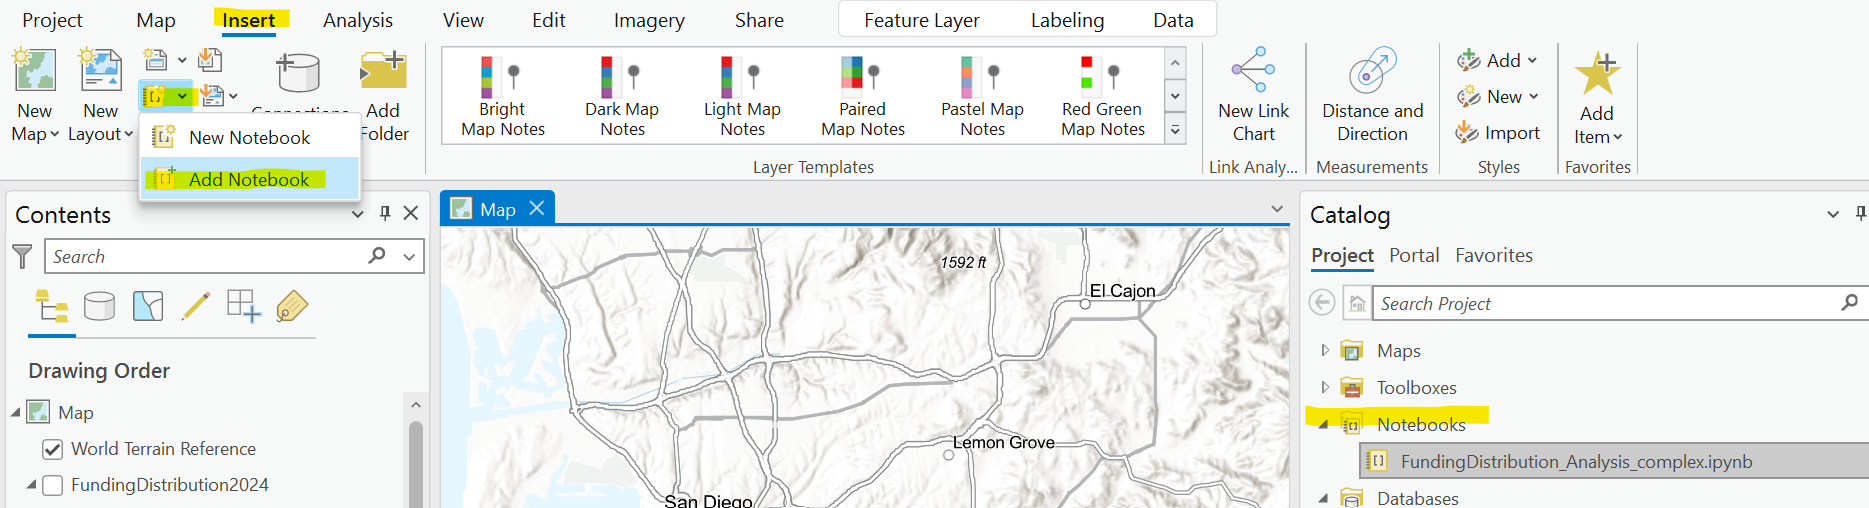

## Import packages and ingest data

In [2]:
#Imports

import arcpy
import traceback
import sys
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## Data Sources

Create a new folder "20xx_FundingDistribution" to save the data sources below, at the directory: C:\\Users\yourname\Documents\ArcGIS\Projects\

* California Climate Investments Priority Populations 
https://ww2.arb.ca.gov/sites/default/files/auction-proceeds/map/PriorityPopulations2023GDBpackage.zip  

    * Priority Populations (Single boundary layer)

* CalEnviroScreen 4.0 
https://oehha.ca.gov/media/downloads/calenviroscreen/document/calenviroscreen40gdbf2021gdb.zip  

* CA GGRF Project Map 
https://ww2.arb.ca.gov/sites/default/files/auction-proceeds/arsupportdata/dl/cci_2024ar_publicmapdata.zip  

* CCIRTS Tabular Data
https://ww2.arb.ca.gov/sites/default/files/auction-proceeds/arsupportdata/dl/cci_2024ar_detaileddata.xlsx

<b>(Update URLs as necessary to the most recent file versions)</b>

## Specify Data Source Locations

Edit the year and file path suffix below to reflect correct filepath for the above datasources saved on your machine

In [4]:
#Current Year
YYYY = "2024"
YY = "24"

# The "suffix" ARXX will be used as a datestamp during filenaming
suffix = "AR24"

In [16]:
# The folder 20XX_FundingDistribution located on your C Drive will serve as the root directory
directory = f"C:\\Users\\kecraig\\Documents\\ArcGIS\\Projects\\{YYYY}_FundingDistribution"

# Ensure the correct version of the CA GGRF Project Map data is referenced here
cci_gdb = os.path.join(directory, f"cci_{YYYY}ar_publicmapdata\\CCIRTS_{YYYY}AR.gdb")

# Ensure the correct version of the CCIRTS tabular data is referenced here
cci_data = os.path.join(directory, f"cci_{YYYY}ar_detaileddata.xlsx")

print(cci_gdb)
print(cci_data)

C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\cci_2024ar_publicmapdata\CCIRTS_2024AR.gdb
C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\cci_2024ar_detaileddata.xlsx


In [17]:
# Get the project geodatabase
def get_project_gdb():
    # Get the current ArcGIS Pro project
    project = arcpy.mp.ArcGISProject("CURRENT")
    # Get the default geodatabase of the project
    project_gdb = project.defaultGeodatabase
    if not project_gdb:
        raise Exception("No default geodatabase found in the project.")
    return project_gdb

project_gdb = get_project_gdb()
print(project_gdb)

C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\2024_FundingDistribution.gdb


In [45]:
# Specify the source location of the priority population boundary layer

# Ensure the correct version of the priority population boundary layer is referenced here
PP_Boundary_lpkx = os.path.join(directory, "New_PriorityPop_Boundary\\PP_Single_Layer2020Block_CES4.lpkx")

# Define the target feature class path in the project geodatabase where you would like to export features to
PP_Boundary = f"{project_gdb}\\CES4_PP_{suffix}"

# Make a feature layer from the layer package (.lpkx)
arcpy.management.MakeFeatureLayer(PP_Boundary_lpkx, "temp_layer")

# Clear any existing selection
arcpy.management.SelectLayerByAttribute("temp_layer", "CLEAR_SELECTION")

# Ensure all features will be included
count = int(arcpy.management.GetCount("temp_layer")[0])
print(f"Number of features in source: {count}")

# Step 2: Export the feature layer to your project geodatabase
arcpy.management.CopyFeatures("temp_layer", PP_Boundary)

# Step 3: Optional cleanup if needed (delete the temporary layer)
arcpy.management.Delete("temp_layer")

print(f"Feature class has been successfully exported to: {project_gdb}")


Number of features in source: 10278
Feature class has been successfully exported to: C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\2024_FundingDistribution.gdb


<html>
<body>
<h1 style="background-color: #022851;"><center>
    <br><font size="+3.5">
    <font color=#FFBF00><b>Summarize California Climate Investments funding amounts</b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00><b>Create program-specific summaries of investments by priority population boundary</b></font>
   </font>
    </center>
</h1>
</body>
</html>


## Step 1. Ingest Spatial Data from Geodatabase

In [56]:
#Export the polygons, lines, and points from the CCI geodatabase to the project geodatabase.

# Set the path to the source feature classes
Polygon = os.path.join(cci_gdb, "Polygon_Data")
Line = os.path.join(cci_gdb, "Line_Data")
Point = os.path.join(cci_gdb, "Point_Data")

# Define the target feature class path in the project geodatabase where you would like to export features to
Polygon_Data = f"{project_gdb}\\Polygon_Data_{suffix}"
Line_Data = f"{project_gdb}\\Line_Data_{suffix}"
Point_Data = f"{project_gdb}\\Point_Data_{suffix}"

# Copy the feature class to the project geodatabase
arcpy.management.CopyFeatures(Polygon, Polygon_Data)
arcpy.management.CopyFeatures(Line, Line_Data)
arcpy.management.CopyFeatures(Point, Point_Data)

print(f"Feature classes have been successfully exported to: {project_gdb}")


Feature classes have been successfully exported to: C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\2024_FundingDistribution.gdb


## Step 2. Summarize Data Reported by Census Tract 
Data reported by census tract has no duplicate information (even when data appears to be duplicates) and is handled differently than other Polygon data.  

This section includes the following steps:

* Isolate Data Reported by Census Tract
* Create a Pivot Table to Summarize Data by Census Tract
* Finalize Data by Census Tract
* Join Census Tract Reported Data to Priority Populations Boundaries
* Ensure Census Tract Reported Information is Joined Correctly

### Isolate Data Reported by Census Tract

In [22]:
Polygon_Data_fc = f"Polygon_Data_{suffix}"

#Select polygon data reported by census tract
arcpy.management.SelectLayerByAttribute(Polygon_Data_fc, "NEW_SELECTION", "census_tract <> ''", None)

# For Annual Report 2024, this results in 113,599 objects selected.

<Result 'Polygon_Data_AR24'>

In [23]:
# Define the target feature class path in the project geodatabase where you would like to export features
Polygon_ctData = os.path.join(project_gdb, f"Polygon_ctData_{suffix}")

# Export only the selected features
arcpy.management.CopyFeatures(Polygon_Data_fc, Polygon_ctData)

print(f"Exported selected features to: {Polygon_ctData}")

Exported selected features to: C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\2024_FundingDistribution.gdb\Polygon_ctData_AR24


### Create a Pivot Table to Summarize Data by Census Tract

In [26]:
Polygon_ctData_fc = "Polygon_ctData_"+suffix

# Define the target feature class path in the project geodatabase where you would like to export features to
Polygon_ctData_xlsx = f"{directory}\\Polygon_ctData_{suffix}.xlsx"

# Export the data reported by census tract to Excel
arcpy.conversion.TableToExcel(Polygon_ctData_fc, Polygon_ctData_xlsx,"NAME", "CODE")

<Result 'C:\\Users\\kecraig\\Documents\\ArcGIS\\Projects\\2024_FundingDistribution\\Polygon_ctData_AR24.xlsx'>

In [37]:
# Create a pivot table to sum the TOTAL_GGRF_FUNDING by CENSUS_TRACT (row) and by ROLE_SUBPROGRAM_ID and BENEFITS_PRIORITY_YN (column) 

Polygon_ctData_df = pd.read_excel(Polygon_ctData_xlsx)
Polygon_ctData_df = Polygon_ctData_df[["total_ggrf_funding","census_tract","role_subprogram_id","BENEFITS_PRIORITY_YN"]]

ct_pTable = pd.pivot_table(Polygon_ctData_df,
                           values="total_ggrf_funding",
                           index="census_tract",
                           columns=["BENEFITS_PRIORITY_YN","role_subprogram_id"],
                           aggfunc="sum",
                           fill_value=0)
Polygon_ctDataPiv_xlsx = f"{directory}\\Polygon_ctDataPiv_{suffix}.xlsx"
ct_pTable.to_excel(Polygon_ctDataPiv_xlsx)

print(f"Pivot table has been saved to {Polygon_ctDataPiv_xlsx}")

Pivot table has been saved to C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\Polygon_ctDataPiv_AR24.xlsx


### Finalize Data by Census Tract

Open the new Excel file "Polygon_ctDataPiv_ARXX" to verify that the data was output correctly.

Ensure that the census tracts are reported in 10-digit census tract codes (instead of 11-digits)

* If needed, create a new column between the Row Labels and Column Labels:
    * Use an Excel formula to remove the preceding 0 must be removed (must be done prior to joining the values in ArcGIS Pro).
    * =RIGHT(A2,10)
    * Copy the data as values and delete the old column

Rename the headers: 
* Use an Excel Formula to quickly create data field names
    * For columns where Priority Population Benefits = YES: “CT_PPGGRF_XX”
    * For columns where Priority Population Benefits = NO: “CT_NOPPGGRF_XX”
    * XX = ROLE_SUBPROGRAM_ID
* A list of the subprogram ID codes is available on SharePoint at: CII Section\Branch\RegionalAnalysisWorkGroup\Subprogram_ID_List_GGRFMap.xlsx


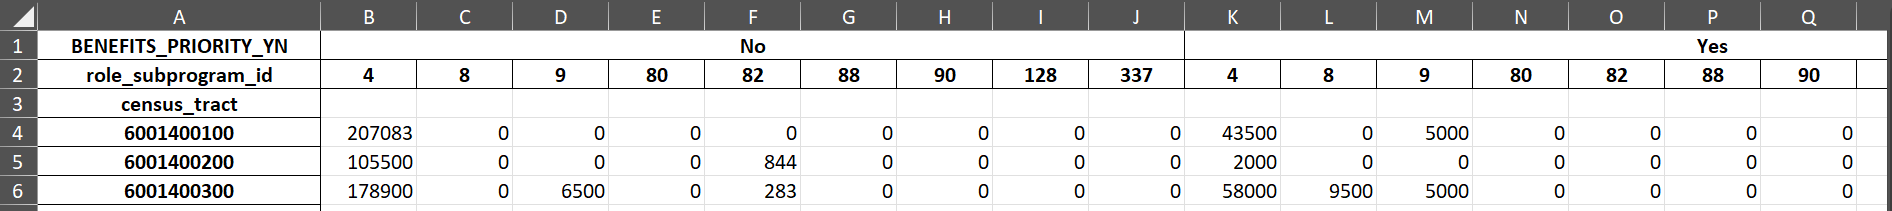

= CONCATENATE("CT_NOPPGGRF_",B2)

= CONCATENATE("CT_PPGGRF_",B2)

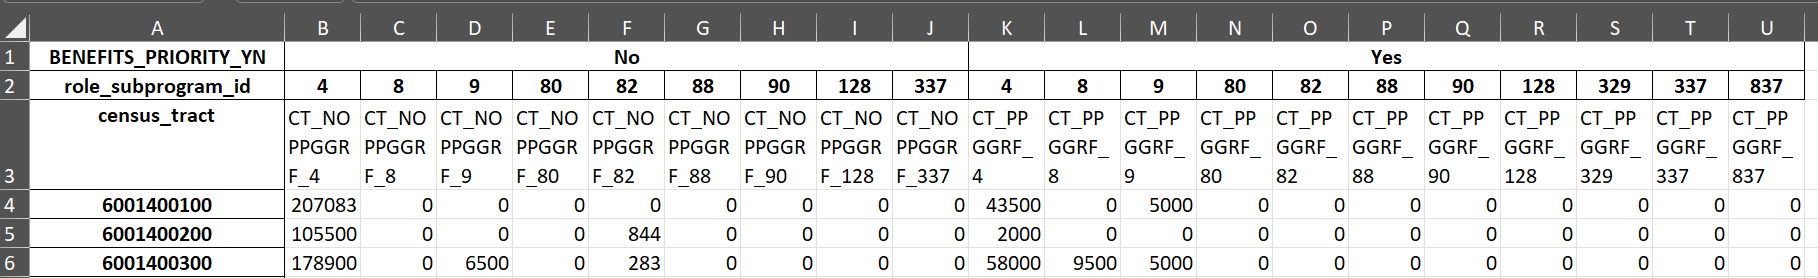

Create three new datafields for the subtotals and grand total:

* Sum of No Total: “CT_NOPPGGRF_TOTAL” (=SUM(B4:J4))
* Sum of Yes Total: “CT_PPGGRF_TOTAL” (=SUM(K4:J4))
* Sum of TOTAL_GGRF_FUNDING: “CT_GGRF_TOTAL” (=SUM(V4:W4))

Row_Labels: Delete this column

New Column: “Census_Tract”	

Data Columns: “CT_PPGGRF_XX”
    

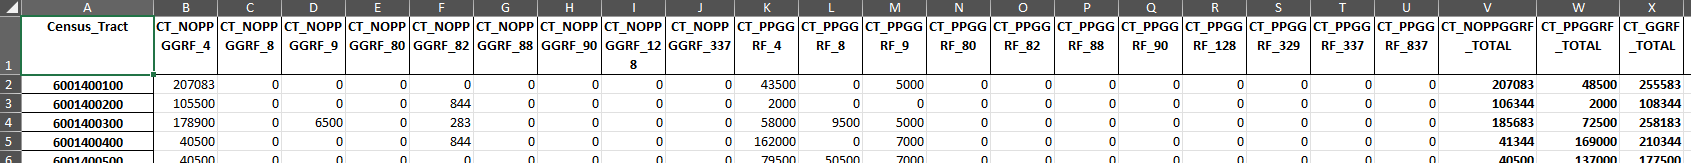

Edit data reported by CVRP to census tract: 06037137000

This census tract does exist, but in 2010 it was erroneously deleted from the 2010 census dataset, so it is not included in CalEnviroScreen.  

In order for the data to be correctly joined to CalEnviroScreen, evenly divide the reported CVRP data for 06037137000 among the two census tracts that encompass this boundary in CalEnviroScreen:

* 6037930401 
* 6037800204

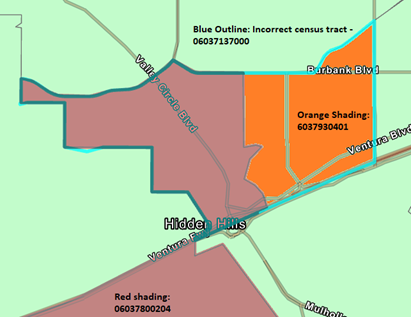


Format all GGRF values to "Number" format

Format the numeric census tract values to “Number” format
* Select the final census tract value and hold “Shift”+”Control” and hit the up arrow key
* With all values selected, click on the yellow warning icon (!) and select 
“Convert to Number”
* If this process does not work, use =NUMBERVALUE() formula in Excel and copy and paste the results as values.  

Save the resulting file as Polygon_ctDataPiv4GIS_ARXX.xlsx and rename the worksheet "4GIS"

In [8]:
# Add the Excel file of Census Tract Data to the project map

# Define the input excel file location 
Polygon_FinalctData_xlsx = os.path.join(directory, f"Polygon_ctDataPiv4GIS_{suffix}.xlsx")

# Define the target table in the project geodatabase that you would like to write the excel file to
Polygon_FinalctData = os.path.join(project_gdb, f"Polygon_ctData4GIS_{suffix}")

arcpy.conversion.ExcelToTable(Polygon_FinalctData_xlsx, Polygon_FinalctData, "4GIS", 1, '')

print(f"Census Tract data has been saved to geodatabase table {Polygon_FinalctData}")

Census Tract data has been saved to geodatabase table C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\2024_FundingDistribution.gdb\Polygon_ctData4GIS_AR24


### Join Census Tract data to Priority Populations Boundaries

Use Joins and Relates to join the census tract data to priority populations boundaries.

Census tract reported data should only be joined to one priority population boundary object per census tract ID.

In [47]:
# Add an Excel file with an indicator of which objects to join by Census Tract 

# Define the input excel file location 
JoinctData_xlsx = os.path.join(directory, f"ExclCTdata4GIS.xlsx")

# Define the target table in the project geodatabase that you would like to write the excel file to
JoinctData = os.path.join(project_gdb, f"ExclCTdata4GIS")

arcpy.conversion.ExcelToTable(JoinctData_xlsx, JoinctData, "4GIS", 1, '')

print(f"Census Tract ID data has been saved to geodatabase table {Polygon_FinalctData}")

Census Tract ID data has been saved to geodatabase table C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\2024_FundingDistribution.gdb\Polygon_ctData4GIS_AR24


In [49]:
# Join an indicator field to the priority population boundary layer
ctID_joined_table = arcpy.management.AddJoin(
    PP_Boundary, 
    "OBJECTID", 
    JoinctData, 
    "OBJECTID_1", 
    "KEEP_ALL", 
    "NO_INDEX_JOIN_FIELDS")

# Define the target feature class path in the project geodatabase where you would like to export features
CES4PP = os.path.join(project_gdb, f"CES4PP_{suffix}")

# Export only the selected features
arcpy.management.CopyFeatures(ctID_joined_table, CES4PP)

print(f"Exported selected features to: {CES4PP}")

Exported selected features to: C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\2024_FundingDistribution.gdb\CES4PP_AR24


In [10]:
#The joined table has renamed the field name for the census tract data field. 
CES4PP_Tract = f"CES4_PP_{suffix}_Tract"

#Join the census tract data to the priority population boundary layer
ct_joined_table = arcpy.management.AddJoin(
    CES4PP,
    CES4PP_Tract,
    Polygon_FinalctData,
    "Census_Tract",
    "KEEP_ALL")

# Define the target feature class path in the project geodatabase where you would like to export features
CES4_ctData = os.path.join(project_gdb, f"CES4PP_ct{suffix}")

# Export only the selected features
arcpy.management.CopyFeatures(ct_joined_table, CES4_ctData)

print(f"Exported selected features to: {CES4_ctData}")

Exported selected features to: C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\2024_FundingDistribution.gdb\CES4PP_ctAR24


### Ensure Census Tract Reported Information is Joined Correctly
Please note: The Step 5 process joins all census tract data to the priority populations boundary layer using the census tract ID.

You will need to adjust the resulting data to avoid double counting.  The data reported by census tract should not be joined to:
* Partial segments of census tracts designated as 1/2 Mile DAC Neighbors (Buffer areas)
* Partial segments of census tracts designated as DAC Tribal Land Areas

Step 6 removes the joined census tract data for these census tracts.

In [19]:
# Get the list of all field names in the dataset
fields = [field.name for field in arcpy.ListFields(CES4_ctData)]

# Define the Census Tract ID data field that we added to identify which census tract fields should retain joined data
CT_ID = f"CES4PP_{suffix}_ExclCTdata4GIS_ExclCTdata"

# Define the prefix string and create a list of census tract data fields
CT_prefix = f"Polygon_ctData4GIS_{suffix}_CT_"
CT_fields = [field for field in fields if field.startswith(CT_prefix)]

# This list will be used in the UpdateCursor function below to iterate over all census tract fields
CT_list = [CT_ID] + CT_fields

# Start an edit session to allow updates to the data
with arcpy.da.UpdateCursor(CES4_ctData, CT_list) as cursor:
    for row in cursor:
        # Check if the value in the "ExclCTdata" field (first field in the list) is "Yes"
        if row[0] == "Yes":  # Assumes the first field is 'ExclCTdata'
            # Iterate through all other fields and set their values to zero
            for i in range(1, len(CT_list)):  # Start from the second field onward
                row[i] = 0
            # Update the row in the table
            cursor.updateRow(row)

print("Data values updated successfully.")

Data values updated successfully.


## Step 3. Summarize Data Reported by Polygon

Polygon data for programs that do not report by census tract is handled differently to account to avoid duplicates introduced when multiple polygons are reported per project.  

Funding amounts must also be proportionally allocated to the priority populations that overlap with the project polygons.  

This section includes the following steps: 

* Isolate Polygon Data that are Not Reported by Census Tract
* Proportionally distribute GGRF funding to overlapping priority populations
* Prepare the Distributed Polygon Data in Excel for Summary
* Create a Pivot Table to Summarize Polygon Data by Priority Population Boundary
* Join Polygon Data to Priority Population Boundaries

### Isolate Polygon Data that is Not Reported by Census Tract

In [21]:
# Clear any current selections on the Polygon_Data layer
arcpy.management.SelectLayerByAttribute(Polygon_Data_fc, "CLEAR_SELECTION")

# Select all polygon data that is not reported by census tract
arcpy.management.SelectLayerByAttribute(Polygon_Data_fc, "NEW_SELECTION", "census_tract = ''", None)

# For Annual Report 2024, this results in 6,079 objects selected.

<Result 'Polygon_Data_AR24'>

In [23]:
# Save the features as their own feature class

# Define the target feature class path in the project geodatabase where you would like to export features
PolyData = os.path.join(project_gdb, f"PolyData_{suffix}")

# Export only the selected features
arcpy.management.CopyFeatures(Polygon_Data_fc, PolyData)

print(f"Exported selected features to: {PolyData}")

Exported selected features to: C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\2024_FundingDistribution.gdb\PolyData_AR24


In [32]:
# Dissolve duplicate polygon features to form multi-part features for each project

# To identify duplicates, use all fields, except OBJECTID and area geometry fields
arcpy.management.Dissolve(PolyData, 
                          f"PolyData_{suffix}_Dissolve", 
                          "reportingcyclename;proj_id;agency;role_subprogram_id;subprogram_name;proj_name;proj_desc;census_tract;total_ggrf_funding;est_ghg_reductions;proj_benefits_desc;senate_district;assembly_district;COUNTY_NAME;BENEFITS_PRIORITY_YN", 
                          None, 
                          "MULTI_PART", 
                          "DISSOLVE_LINES", 
                          '')

# For Annual Report 2024, this resulted in 123 objects

<Result 'C:\\Users\\kecraig\\Documents\\ArcGIS\\Projects\\2024_FundingDistribution\\2024_FundingDistribution.gdb\\PolyData_AR24_Dissolve'>

### Proportionally distribute GGRF funding to overlapping priority populations

First, determine the area of the polygon data associated with each project.

Then, determine the proportion of that area that is overlapped with each priority population.

In [36]:
# Add a data field to the dissolved Polygon Data not reported by census tract, to calculate the original area
# This field will be used later to calculate the proportional overlap of census tracts with each polygon

# Specify the name, type, and other properties of the new field
input_features =  f"PolyData_{suffix}_Dissolve"
field_name = "Orig_Area_SqMi"
field_type = "DOUBLE" 

# Add the field
arcpy.AddField_management(input_features, field_name, field_type) 

# Calculate the area of the polygons in square miles
arcpy.management.CalculateGeometryAttributes(input_features, [(field_name, "AREA_GEODESIC")], "", "SQUARE_MILES_US", "", "SAME_AS_INPUT")

<Result 'PolyData_AR24_Dissolve'>

In [38]:
# Define the target feature class path in the project geodatabase where you would like to export features
PolyJoinData = os.path.join(project_gdb, f"CES4PP_PolyJoinData_ct{suffix}")

arcpy.analysis.PairwiseIntersect([CES4_ctData, input_features], PolyJoinData, "ALL", None, "INPUT")

<Result 'C:\\Users\\kecraig\\Documents\\ArcGIS\\Projects\\2024_FundingDistribution\\2024_FundingDistribution.gdb\\CES4PP_PolyJoinData_ctAR24'>

In [39]:
# Add a data field to the output feature class to calculate the area of each segment of overlap with priority population boundaries
# This field will be used later to calculate the proportional overlap of census tracts with each polygon

# Specify the name, type, and other properties of the new field
input_features =  PolyJoinData
field_name = "Area_SqMi"
field_type = "DOUBLE" 

# Add the field
arcpy.AddField_management(input_features, field_name, field_type) 

# Calculate the area of the polygons in square miles
arcpy.management.CalculateGeometryAttributes(input_features, [(field_name, "AREA_GEODESIC")], "", "SQUARE_MILES_US", "", "SAME_AS_INPUT")

<Result 'C:\\Users\\kecraig\\Documents\\ArcGIS\\Projects\\2024_FundingDistribution\\2024_FundingDistribution.gdb\\CES4PP_PolyJoinData_ctAR24'>

In [41]:
# Add a data field to calculate the proportional overlap of each segment compared to the original polygon area

# Specify the name, type, and other properties of the new field
input_features =  PolyJoinData
field_name = "Segment_Proportion"
field_type = "DOUBLE" 

# Add the field
arcpy.AddField_management(input_features, field_name, field_type) 

# Calculate the proportion as the segment area/original area
arcpy.management.CalculateField(input_features, 
                                field_name, 
                                "!Area_SqMi! / !Orig_Area_SqMi!", 
                                expression_type="PYTHON3")

<Result 'C:\\Users\\kecraig\\Documents\\ArcGIS\\Projects\\2024_FundingDistribution\\2024_FundingDistribution.gdb\\CES4PP_PolyJoinData_ctAR24'>

In [43]:
# Export data to Excel

Polygon_noctData_fc = f"CES4PP_PolyJoinData_ct{suffix}"

# Define the target feature class path in the project geodatabase where you would like to export features to
Polygon_noctData_xlsx = f"{directory}\\Polygon_noctData_{suffix}.xlsx"

# Export the data reported by census tract to Excel
arcpy.conversion.TableToExcel(Polygon_noctData_fc, Polygon_noctData_xlsx,"NAME", "CODE")

<Result 'C:\\Users\\kecraig\\Documents\\ArcGIS\\Projects\\2024_FundingDistribution\\Polygon_noctData_AR24.xlsx'>

### Prepare the Distributed Polygon Data in Excel for Summary

<b>Add a new column “Count” to determine the number of duplicates created by each reported polygon overlapping with several priority population boundaries.</b>

=COUNTIF(\\$DJ\\$2:\\$DJ\\$50000,DJ2)

Where the range covers the data extent for the “FID_NoCT_polyAR24” column, and the target DJ2 refers to the object ID from the reported polygon data (“FID_NoCT_polyAR24”)

To estimate the amount of “total_ggrf_funding” invested in each area by proportional allocation or equal allocation:
* Add a new column “dist_total_ggrf_funding"

<b>Please Note:</b>

<b>Low Carbon Transit Operations Program</b>

Three project IDs have information reported as point locations, and the polygon location data are duplicates:
* 16-17-D03-034
* 16-17-D03-035
* 16-17-D05-060

<b>Transit and Intercity Rail Capital Program</b>

Eight project IDs have information reported as point locations, and the polygon location data are duplicates:
* 2018-09
* 2020-01
* 2022-02
* 2022-03
* 2022-04
* 2022-09
* 2022-10
* 2022-20

<b>Proportional Allocation</b>

The sum of the segment proportion is not always equal to one.  This is true in the case where polygon boundaries extend beyond the coastal or state borders of the priority population input file.  Instead of using the segment proportion as the proportion for the ggrf funding adjustment, we use the proportion of the segment / sum of all segment proportions to properly allocate the total funding proportionally.

* If a project has ten equal segments, but one of the segments is excluded due to overlap outside the priority population boundary layer, we have 9 segments with a proportion of 0.1 each. Only 90% of the funding will be accounted for by multiplying the original funding amount by 0.1 for each of the nine segments.  However, 100% of the funding amount is accounted for when multiplying the original funding amount by (0.1/0.9) for each of the nine segments.

<b>Add a new column "dist_total_ggrf_funding" that distributes the funding amounts per polygon segment according to the notes above.</b>

=IF(OR(AND(DN2=68,DL2="16-17-D03-034"),AND(DN2=68,DL2="16-17-D03-035"),AND(DN2=68,DL2="16-17-D05-060"),AND(DD2=78,DB2="2018-09"),AND(DD2=78,DB2="2020-01"),AND(DD2=78,DB2="2022-02"),AND(DD2=78,DB2="2022-03"),AND(DD2=78,DB2="2022-04"),AND(DD2=78,DB2="2022-09"),AND(DD2=78,DB2="2022-10"),AND(DD2=78,DB2="2022-20")),0,(DS2*(ED2/SUMIF(\\$DJ\\$2:\\$DJ\\$26368,DJ2,\\$ED\\$2:\\$ED50000))))

Where:
* column DN is the “role_subprogram_id” (68 = LCTOP; 78 = TIRCP), 
* column DL is the “proj_id”, 
* column DS is the “total_ggrf_funding”, 
* column ED is the “Segment_Proportion", and 
* column DJ is the "FID_PolyData_AR24_Dissolve" unique identifier for the project polygon data.

Save the Excel file as "Polygon_noctData4Piv_{suffix}.xlsx"


### Create a Pivot Table to Summarize Polygon Data by Priority Population Boundary

In [6]:
# Create a pivot table to sum the dist_total_ggrf_funding by FID_CES4PP_ctARXX (row) and by role_subprogram_id and BENEFITS_PRIORITY_YN (column) 

Polygon_noctData_xlsx = f"{directory}\\Polygon_noctData4Piv_{suffix}.xlsx"
objectid_field = f"FID_CES4PP_ct{suffix}"

Polygon_noctData_df = pd.read_excel(Polygon_noctData_xlsx)
Polygon_noctData_df = Polygon_noctData_df[["dist_total_ggrf_funding",objectid_field,"role_subprogram_id","BENEFITS_PRIORITY_YN"]]

noct_pTable = pd.pivot_table(Polygon_noctData_df,
                           values="dist_total_ggrf_funding",
                           index=objectid_field,
                           columns=["BENEFITS_PRIORITY_YN","role_subprogram_id"],
                           aggfunc="sum",
                           fill_value=0)
Polygon_noctDataPiv_xlsx = f"{directory}\\Polygon_noctDataPiv_{suffix}.xlsx"
noct_pTable.to_excel(Polygon_noctDataPiv_xlsx)

print(f"Pivot table has been saved to {Polygon_noctDataPiv_xlsx}")

Pivot table has been saved to C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\Polygon_noctDataPiv_AR24.xlsx


<b>Rename the headers:</b> 
* Use an Excel Formula to quickly create data field names
    * For columns where Priority Population Benefits = YES: “Poly_PPGGRF_XX”
    * For columns where Priority Population Benefits = NO: “Poly_NOPPGGRF_XX”
    * XX = ROLE_SUBPROGRAM_ID
* A list of the subprogram ID codes is available on SharePoint at: CII Section\Branch\RegionalAnalysisWorkGroup\Subprogram_ID_List_GGRFMap.xlsx

= CONCATENATE("Poly_NOPPGGRF_",B2)

= CONCATENATE("Poly_PPGGRF_",B2)

<b>Create three new datafields for the subtotals and grand total:</b>

* Sum of No Total: “Poly_NOPPGGRF_TOTAL” (=SUM(B4:F4))
* Sum of Yes Total: “Poly_PPGGRF_TOTAL” (=SUM(G4:M4))
* Sum of TOTAL_GGRF_FUNDING: “Poly_GGRF_TOTAL” (=SUM(N4:O4))

<b>First Column:</b> “FID_CES4PP_ct{suffix}”

<b>Data Columns:</b> “Poly_PPGGRF_XX”

Rename the worksheet "4GIS" and save the file as "Polygon_noctDataPiv4GIS_{suffix}.xlsx"


### Join Polygon Data to Priority Population Boundaries

In [18]:
# Perform Excel to Table function to be able to join the data you just saved in Excel 

# Define the input excel file location 
JoinPolyData_xlsx = os.path.join(directory, f"Polygon_noctDataPiv4GIS_{suffix}.xlsx")

# Define the target table in the project geodatabase that you would like to write the excel file to
JoinPolyData = os.path.join(project_gdb, f"Polygon_noctDataPiv4GIS_{suffix}")

arcpy.conversion.ExcelToTable(JoinPolyData_xlsx, JoinPolyData, "4GIS", 1, '')

print(f"Summarized Polygon Data has been saved to geodatabase table {JoinPolyData}")

Summarized Polygon Data has been saved to geodatabase table C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\2024_FundingDistribution.gdb\Polygon_noctDataPiv4GIS_AR24


In [24]:
#Join the polygon data to the priority population boundary layer
ctpoly_joined_table = arcpy.management.AddJoin(
    CES4_ctData,
    "OBJECTID",
    JoinPolyData,
    f"FID_CES4PP_ct{suffix}",
    "KEEP_ALL")

# Define the target feature class path in the project geodatabase where you would like to export features
CES4_ctpolyData = os.path.join(project_gdb, f"CES4PP_ctpoly{suffix}")

# Export only the selected features
arcpy.management.CopyFeatures(ctpoly_joined_table, CES4_ctpolyData)

print(f"Exported selected features to: {CES4_ctpolyData}")

# In AR24, this resulted in polygon data joined to 8,725 of the priority population boundaries

Exported selected features to: C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\2024_FundingDistribution.gdb\CES4PP_ctpolyAR24


## Step 4. Summarize Point Data

The majority of California Climate Investments Spatial Data is submitted as point locations.  

This section includes the following steps:

* Distribute Funding Amount Equally per Point for Tree Planting Programs
* Prepare the Point Data in Excel for Summary
* Create a Pivot Table to Summarize Program Funding Data by Point
* Summarize Point Data Within Priority Population Boundaries
* Remove "OBJECTID" duplicate data fields
* Clean up data field names

### Distribute Funding Amount Equally per Point for Tree Planting Programs

Tree Planting Programs have reporting differences that need to be accounted for prior to summarizing data reported by point.  For these programs, funding amounts and co-benefits are only reported during the first reporting cycle.  
* Urban and Community Forestry (role_subprogram_id = 45) 
* Urban Greening (role_subprogram_id = 138)

Therefore, every tree reported during that first reporting cycle is associated with the GGRF dollars implemented and receives the same dollar value and creates duplicate GGRF dollars.  However, any trees reported during subsequent reporting cycles are associated with 0 GGRF dollars.

For the Funding Distribution Analysis, we assume that the reported implemented GGRF$ should be distributed equally among all reported tree locations.

In [28]:
# Export data to Excel

Point_Data_fc = f"Point_Data_{suffix}"

# Define the target feature class path in the project geodatabase where you would like to export features to
Point_Data_xlsx = f"{directory}\\Point_Data_{suffix}.xlsx"

# Export the point data to Excel
arcpy.conversion.TableToExcel(Point_Data_fc, Point_Data_xlsx,"NAME", "CODE")

<Result 'C:\\Users\\kecraig\\Documents\\ArcGIS\\Projects\\2024_FundingDistribution\\Point_Data_AR24.xlsx'>

In [32]:
# Create a pivot table to show the maximum of the total_ggrf_funding and the count of the OBJECTID as the number of trees planted (columns) by project_id (rows)

Point_Data_df = pd.read_excel(Point_Data_xlsx)
Tree_Data_df = Point_Data_df[Point_Data_df['role_subprogram_id'].isin([45,138])]
Tree_Data_df = Tree_Data_df[["OBJECTID","total_ggrf_funding","proj_id"]]

TreePoint_pTable = pd.pivot_table(Tree_Data_df,
                           index="proj_id",
                           values=["total_ggrf_funding","OBJECTID"],
                           aggfunc={"total_ggrf_funding": "max", "OBJECTID": "count"},
                           fill_value=0)

# Calculate the "GGRF per Tree" for each Project ID 
TreePoint_pTable['GGRF_per_Tree'] = TreePoint_pTable['total_ggrf_funding'] / TreePoint_pTable['OBJECTID']

Point_TreeDataPiv_xlsx = f"{directory}\\Point_TreeDataPiv_{suffix}.xlsx"
TreePoint_pTable.to_excel(Point_TreeDataPiv_xlsx)

print(f"Pivot table has been saved to {Point_TreeDataPiv_xlsx}")

Pivot table has been saved to C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\Point_TreeDataPiv_AR24.xlsx


### Prepare the Point Data in Excel for Summary

Several programs have additional considerations that must be accounted for prior to proceeding.

<b>Open the Point_Data_{suffix}.xlsx and copy the results in the Point_TreeDataPiv_xlsx to a new worksheet called "Tree_Planting_Programs"</b>

#### Create a new data field to calculate the GGRF funding amount per point location

<b>Rename the "total_ggrf_funding" as "reported_ggrf_funding".</b>

<b>Add a new column to the left to create a new data field "total_ggrf_funding".</b>

This column will be used later in this process.

#### Create a "UNIQUE_ID" to identify data points that represent multiple locations for the same project

<b>Add a new column as column 1 called "UNIQUE_ID".</b>

=CONCATENATE(F2,"_",C2,"_",D2,"_",LEFT(H2,10),"_",LEFT(I2,10),"_",L2,"_",M2,"_",LEFT(O2,10),"_",LEFT(P2,10))

Where: 
* column F is the “role_subprogram_id”
* column C is the “reporting_cycle_name”
* column D is the “proj_id”
* column H is the “proj_name” 
* column I is the “proj_desc”
* column L is the “reported_total_ggrf_funding”
* column M is the “est_GHG_reductions” 
* column O is the “senate_district" 
* column P is the “assembly_district”

#### Count the number of unique data points per project:

<b>Add a new column "Count" that distributes the funding amounts according to the notes above.</b>

=IF(AND(D2="2016-07",C2="2018"),1,IF(AND(D2="2018-19",C2="2023"),1,IF(AND(D2="G17-CMDC-01 Amendment 1",C2="2023",L2=99960),1,IF(AND(D2="G17-CMDC-01 Amendment 1",C2="2020",L2=50000),1,(COUNTIF($A$2:$A$500000,A2))))))

Where:

* column D is the "proj_ID"
* column C is the "reportingcyclename"
* column L is the "reported_total_ggrf_funding"
* column A is the "UNIQUE_ID"

#### Distribute the total GGRF funding amount among all points per project:

<b>---Programs that report single point locations per data row (no duplicates)</b>
    
* HVIP (role_subprogram_id = 5)
* Rural School Bus Pilot (role_subprogram_id = 124)
* FARMER (role_subprogram_id = 237)
* CORE (role_subprogram_id = 263)

<b>---Programs that report single point locations per data row (no duplicates), with a few exceptions</b>

* CAP (role_subprogram_id = 235) 

Without a unique record ID, the spatial data does not have enough information retained to identify unique records.  For this program, to identify duplicates would require "VoucherID", "VoucherName", and "VoucherDescription" to be retained in the spatial dataset.

* CAP Project IDs that have projects with more than one reported point location:
    * Antelope Valley AQMD_2019-20_4
    * Antelope Valley AQMD_2017-18_3

All other projects are assumed to have one location per CCIRTS record

<b>---Tree Planting Programs</b>
    
* Urban and Community Forestry (role_subprogram_id = 45) 
* Urban Greening (role_subprogram_id = 138)

The approach for the funding distribution analysis assumes that the maximum amount reported for the project ID is the total implemented GGRF amount.  That amount is divided by the total number of trees reported to date for the GGRF per tree estimate.  Each point is assumed to represent an equal share of the total investment in that project ID.

Note: For projects with few trees reported, this may result in an overestimate of project benefits to communities where trees are planted first, until additional tree point locations are received in future reporting cycles.

<b>---Programs that report multiple data types (Points, Lines, and Polygons)</b>

* TIRCP (role_subprogram_id = 78) 

One TIRCP project has both line data and point data reported for a "Wayside Power" project.  In 2016, 15k GGRF dollars were reported implemented and line data was submitted.  In 2018, two additional project rows with 185k GGRF each were reported with no kml data and reported to the same point.  In the next section, the 15k GGRF reported with line data is discarded, since providing power is a benefit local to the station location.  This method splits the entire reported total (385k GGRF)  between the two points that were reported in 2018.

* TIRCP Project ID affected:
    * 2015-11

<b>---Programs that have join issues in the CCIRTS spatial data ETL process (Points, Lines, and Polygons)</b>

* TIRCP (role_subprogram_id = 78) 
* Safe and Affordable Drinking Water Program (role_subprogram_id = 549) 

For reporting cycles where kml files are reported, the implemented details are joined by the project ID; however, if multiple lines in CCIRTS are reported with differentiating information only available in the "voucherID", only one row of data is joined during the CCIRTS ETL process (not the sum of all data reported for that project ID under multiple "voucherID"s).  

* TIRCP project IDs affected:
    * 2018-09
    * 2018-12
    * 2018-19
    * 2022-04
    * 2022-06
    * 2022-12
    * 2022-16
    * 2022-19
    * 2022-20
* Safe and Affordable Drinking Water project IDs affected:
    * D1917002
    * D1917003
    * D1917005

$D1917002 (reporting cycle 2021 Semi-Annual)$: These points previously had only 2,868 GGRF joined, instead of half of the points getting joined with the first data row in CCIRTS, 79,574 GGRF.  Corrected to divide the total number of GGRF (82,442 GGRF) reported to this project ID during reporting cycle 2021 semi-annual, split equally among all reported points.

$D1917003 (reporting cycle 2021 Semi-Annual)$: These points previously had only 7,107 GGRF joined, instead of half of the points getting joined with the first data row in CCIRTS, 15,309 GGRF.  Corrected to divide the total number of GGRF (22,416 GGRF) reported to this project ID during reporting cycle 2021 semi-annual, split equally among all reported points.

$D1917005 (reporting cycle 2021)$: These points previously had only 280,966 GGRF joined, instead of half of the points getting joined with the first data row in CCIRTS, 3,124 GGRF.  Corrected to divide the total number of GGRF (284,090 GGRF) reported to this project ID during reporting cycle 2021, split equally among all reported points.

<b>---Unless otherwise specified, all GGRF equally divided among multiple points reported.</b>

<b>For the new column "total_ggrf_funding", use the below formula to distribute the funding amounts according to the notes above.</b>

=IF(AND(F2=235,D2="Antelope Valley AQMD_2019-20_4",L2=483),(966/4),IF(AND(F2=235,D2="Antelope Valley AQMD_2019-20_4",L2=827),(2481/5),IF(AND(F2=235,D2="Antelope Valley AQMD_2019-20_4",L2=2742),(L2/3),IF(OR(AND(F2=235,D2="Antelope Valley AQMD_2019-20_4",L2=22506),AND(F2=235,D2="Antelope Valley AQMD_2019-20_4",L2=4046),AND(F2=235,D2="Antelope Valley AQMD_2019-20_4",L2=3963),AND(F2=235,D2="Antelope Valley AQMD_2019-20_4",L2=2549),AND(F2=235,D2="Antelope Valley AQMD_2019-20_4",L2=1100),AND(F2=235,D2="Antelope Valley AQMD_2019-20_4",L2=1003),AND(F2=235,D2="Antelope Valley AQMD_2019-20_4",L2=818),AND(F2=235,D2="Antelope Valley AQMD_2019-20_4",L2=809),AND(F2=235,D2="Antelope Valley AQMD_2019-20_4",L2=593)),L2,IF(OR(AND(F2=235,D2="Antelope Valley AQMD_2019-20_4"),AND(F2=235,D2="Antelope Valley AQMD_2017-18_3")),(L2/S2),IF(OR(F2=5,F2=124,F2=235,F2=237,F2=263,F2=619),L2,IF(OR(F2=138,F2=45),VLOOKUP(D2,Tree_Planting_Programs!$A$2:$D$1000,4,FALSE),IF(AND(F2=78,D2="2015-11"),(185000/S2),IF(AND(F2=78,D2="2018-09"),18178000,IF(AND(C2="2022",F2=78,D2="2018-12"),(60820000/S2),IF(AND(C2="2022",F2=78,D2="2018-19"),(5319000/S2),IF(AND(F2=78,D2="2022-04"),(782000/S2),IF(AND(C2="2023",F2=78,D2="2022-06"),(947000/S2),IF(AND(C2="2023",F2=78,D2="2022-12"),(2166000/S2),IF(AND(C2="2023",F2=78,D2="2022-16"),(624000/S2),IF(AND(C2="2023",F2=78,D2="2022-19"),(1124900/S2),IF(AND(C2="2023",F2=78,D2="2022-20"),(5888000/S2),IF(AND(C2="2021 Semi-Annual",F2=549,D2="D1917002"),(82442/S2),IF(AND(C2="2021 Semi-Annual",F2=549,D2="D1917003"),(22416/S2),IF(AND(C2="2021",F2=549,D2="D1917005"),(284090/S2),(L2/S2)))))))))))))))))))))

Where:

* column D is the "proj_ID"
* column C is the "reportingcyclename"
* column L is the "reported_total_ggrf_funding"
* column F is the "role_subprogram_id"
* column S is the "count"

<b>Save the Excel file as "Point_Data4Piv_{suffix}.xlsx"</b>

### Create a Pivot Table to Summarize Program Funding Data by Point

This pivot table will be used to join the program funding totals to the Point Data feature class.

In [79]:
# Create a pivot table to sum the total_ggrf_funding by OBJECTID (row) and by role_subprogram_id and BENEFITS_PRIORITY_YN (column) 

Point_Data4Piv_xlsx = os.path.join(directory,f"Point_Data4Piv_{suffix}.xlsx")

Point_Data4Piv_df = pd.read_excel(Point_Data4Piv_xlsx)

Point_pTable = pd.pivot_table(Point_Data4Piv_df,
                           index="OBJECTID",
                           values="total_ggrf_funding",
                           columns=["BENEFITS_PRIORITY_YN","role_subprogram_id"],
                           aggfunc="sum",
                           fill_value=0)

Point_DataPiv_xlsx = f"{directory}\\Point_DataPiv_{suffix}.xlsx"
Point_pTable.to_excel(Point_DataPiv_xlsx)

print(f"Pivot table has been saved to {Point_DataPiv_xlsx}")

Pivot table has been saved to C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\Point_DataPiv_AR24.xlsx


#### Open the new Excel file "Point_DataPiv_ARXX" to verify that the data was output correctly.

Rename the headers:

Use an Excel Formula to quickly create data field names
For columns where Priority Population Benefits = YES: “Point_PPGGRF_XX”
For columns where Priority Population Benefits = NO: “Point_NOPPGGRF_XX”
XX = ROLE_SUBPROGRAM_ID

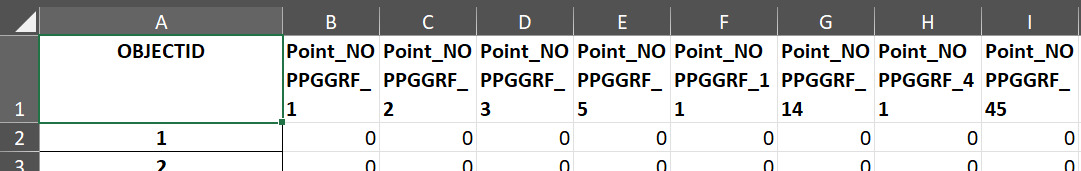

= CONCATENATE("Point_NOPPGGRF_",B2)

= CONCATENATE("Point_PPGGRF_",B2)

Create three new datafields for the subtotals and grand total:

Sum of No Total: “Point_NOPPGGRF_TOTAL” (=SUM(B4:BF4))
Sum of Yes Total: “Point_PPGGRF_TOTAL” (=SUM(BG4:DI4))
Sum of TOTAL_GGRF_FUNDING: “Point_GGRF_TOTAL” (=SUM(DJ4:DK4))
Row_Labels: Delete this column

First Column: “OBJECTID”

Data Columns: “Point_PPGGRF_XX”

Name the worksheet "4GIS"

<b>Save the Excel file as "Point_DataPiv4GIS_{suffix}.xlsx"</b>

### Summarize Point Data Within Priority Population Boundaries

In [80]:
# Perform Excel to Table function to be able to join the data you just saved in Excel 

# Define the input excel file location 
JoinPointData_xlsx = os.path.join(directory,f"Point_DataPiv4GIS_{suffix}.xlsx")

# Define the target table in the project geodatabase that you would like to write the excel file to
JoinPointData = os.path.join(project_gdb, f"Point_DataPiv4GIS_{suffix}")

arcpy.conversion.ExcelToTable(JoinPointData_xlsx, JoinPointData, "4GIS", 1, '')

print(f"Summarized Point Data has been saved to geodatabase table {JoinPointData}")

Summarized Point Data has been saved to geodatabase table C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\2024_FundingDistribution.gdb\Point_DataPiv4GIS_AR24


In [84]:
#Join the point data to the priority population boundary layer
ctpolypt_joined_table = arcpy.management.AddJoin(
    f"Point_Data_{suffix}",
    "OBJECTID",
    JoinPointData,
    "OBJECTID",
    "KEEP_ALL")

# Define the target feature class path in the project geodatabase where you would like to export features
FinalPointData = os.path.join(project_gdb, f"FinalPointData_{suffix}")

# Export only the selected features
arcpy.management.CopyFeatures(ctpolypt_joined_table, FinalPointData)

print(f"Exported selected features to: {FinalPointData}")

# In AR24, 226,432 points were joined with subprogram ggrf total data

Exported selected features to: C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\2024_FundingDistribution.gdb\FinalPointData_AR24


In [94]:
# Use the geoprocessing tool "Summarize Within" to sum the total of all GGRF for each point data field

# Get the list of all field names in the dataset
fields = [field.name for field in arcpy.ListFields(FinalPointData)]

# Define the prefix string and create a list of census tract data fields
pt_prefix = f"Point_DataPiv4GIS_{suffix}_Point_"
pt_fields = [field for field in fields if field.startswith(pt_prefix)]

#Define output feature class
CES4_ctpolyptData = os.path.join(project_gdb, f"CES4PP_ctpolypt{suffix}")

# Create the list of field and aggregation operation pairs (e.g., [field, "SUM"])
field_sum_pairs = [(field, "SUM") for field in pt_fields]

arcpy.analysis.SummarizeWithin(
    in_polygons=f"CES4PP_ctpoly{suffix}", 
    in_sum_features=FinalPointData, 
    out_feature_class=CES4_ctpolyptData, 
    keep_all_polygons="KEEP_ALL", 
    sum_fields=field_sum_pairs, 
    sum_shape="ADD_SHAPE_SUM", 
    shape_unit="SQUAREMILES", 
    group_field=None, 
    add_min_maj="NO_MIN_MAJ", 
    add_group_percent="NO_PERCENT", 
    out_group_table=None)

print("Data values updated successfully.")

Data values updated successfully.


### Remove "OBJECTID" duplicate data fields

Open the attribute table of "CES4PP_ctpolypt{suffix}" and right click on the duplicate data field "OBJECTID" and select "delete"

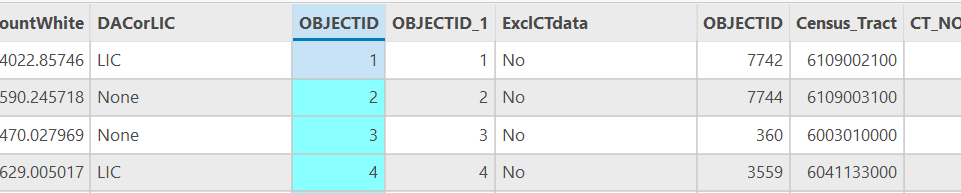

Be sure to also delete any additional duplicate "OBJECTID" datafields

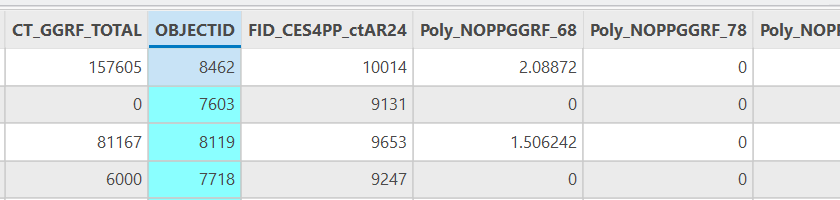

### Clean up data field names

During the previous join processes, table names were appended as prefixes to the data field names in the output files.  The following steps remove these prefixes.

In [95]:
# Clean up data field names for priority population boundary layer

# Define input and output
input_fc = CES4_ctpolyptData
output_fc = os.path.join(project_gdb, f"CES4PP_ctpolypt{suffix}_v2")
prefix = f"CES4PP_ct{suffix}_CES4PP_{suffix}_CES4_PP_{suffix}_"

# List all fields of the resulting joined table
fields = arcpy.ListFields(input_fc)

# Rename the fields to remove the prefix
for field in fields:
    # Check if the field name has the prefix from the joined table names
    if field.name.startswith(prefix):
        # Generate the new field name by removing the prefix
        new_name = field.name[len(prefix):]  # Remove the prefix
        # Rename the field
        arcpy.management.AlterField(input_fc, field.name, new_name)

# Save the result to a new feature class
arcpy.management.CopyFeatures(input_fc, output_fc)

<Result 'C:\\Users\\kecraig\\Documents\\ArcGIS\\Projects\\2024_FundingDistribution\\2024_FundingDistribution.gdb\\CES4PP_ctpolyptAR24_v2'>

In [103]:
# Clean up data field names for census tract exclusion table

# Define input and output
input_fc = os.path.join(project_gdb, f"CES4PP_ctpolypt{suffix}_v2")
output_fc = os.path.join(project_gdb, f"CES4PP_ctpolypt{suffix}_v3")
prefix = f"CES4PP_ct{suffix}_CES4PP_{suffix}_"

# List all fields of the resulting joined table
fields = arcpy.ListFields(input_fc)

# Rename the fields to remove the prefix
for field in fields:
    # Check if the field name has the prefix from the joined table names
    if field.name.startswith(prefix):
        # Generate the new field name by removing the prefix
        new_name = field.name[len(prefix):]  # Remove the prefix
        # Rename the field
        arcpy.management.AlterField(input_fc, field.name, new_name)

# Save the result to a new feature class
arcpy.management.CopyFeatures(input_fc, output_fc)

arcpy.management.Delete(f"CES4PP_ctpolypt{suffix}_v2")

<Result 'C:\\Users\\kecraig\\Documents\\ArcGIS\\Projects\\2024_FundingDistribution\\2024_FundingDistribution.gdb\\CES4PP_ctpolyptAR24_v3'>

In [104]:
# Clean up data field names for census tract data fields

# Define input and output
input_fc = os.path.join(project_gdb, f"CES4PP_ctpolypt{suffix}_v3")
output_fc = os.path.join(project_gdb, f"CES4PP_ctpolypt{suffix}_v4")
prefix = f"CES4PP_ct{suffix}_Polygon_ctData4GIS_{suffix}_"

# List all fields of the resulting joined table
fields = arcpy.ListFields(input_fc)

# Rename the fields to remove the prefix
for field in fields:
    # Check if the field name has the prefix from the joined table names
    if field.name.startswith(prefix):
        # Generate the new field name by removing the prefix
        new_name = field.name[len(prefix):]  # Remove the prefix
        # Rename the field
        arcpy.management.AlterField(input_fc, field.name, new_name)

# Save the result to a new feature class
arcpy.management.CopyFeatures(input_fc, output_fc)

arcpy.management.Delete(f"CES4PP_ctpolypt{suffix}_v3")

<Result 'C:\\Users\\kecraig\\Documents\\ArcGIS\\Projects\\2024_FundingDistribution\\2024_FundingDistribution.gdb\\CES4PP_ctpolyptAR24_v4'>

In [105]:
# Clean up data field names for polygon data fields

# Define input and output
input_fc = os.path.join(project_gdb, f"CES4PP_ctpolypt{suffix}_v4")
output_fc = os.path.join(project_gdb, f"CES4PP_ctpolypt{suffix}_v5")
prefix = f"Polygon_noctDataPiv4GIS_{suffix}_"

# List all fields of the resulting joined table
fields = arcpy.ListFields(input_fc)

# Rename the fields to remove the prefix
for field in fields:
    # Check if the field name has the prefix from the joined table names
    if field.name.startswith(prefix):
        # Generate the new field name by removing the prefix
        new_name = field.name[len(prefix):]  # Remove the prefix
        # Rename the field
        arcpy.management.AlterField(input_fc, field.name, new_name)

# Save the result to a new feature class
arcpy.management.CopyFeatures(input_fc, output_fc)

arcpy.management.Delete(f"CES4PP_ctpolypt{suffix}_v4")

<Result 'C:\\Users\\kecraig\\Documents\\ArcGIS\\Projects\\2024_FundingDistribution\\2024_FundingDistribution.gdb\\CES4PP_ctpolyptAR24_v5'>

In [108]:
# Clean up data field names for polygon data fields

#Delete original feature class
arcpy.management.Delete(f"CES4PP_ctpolypt{suffix}")

# Define input and output
input_fc = os.path.join(project_gdb, f"CES4PP_ctpolypt{suffix}_v5")
output_fc = os.path.join(project_gdb, f"CES4PP_ctpolypt{suffix}")
prefix = f"sum_point_datapiv4gis_ar{YY}_"

# List all fields of the resulting joined table
fields = arcpy.ListFields(input_fc)

# Rename the fields to remove the prefix
for field in fields:
    # Check if the field name has the prefix from the joined table names
    if field.name.startswith(prefix):
        # Generate the new field name by removing the prefix
        new_name = field.name[len(prefix):]  # Remove the prefix
        # Rename the field
        arcpy.management.AlterField(input_fc, field.name, new_name)

# Save the result to a new feature class
arcpy.management.CopyFeatures(input_fc, output_fc)

arcpy.management.Delete(f"CES4PP_ctpolypt{suffix}_v5")

<Result 'C:\\Users\\kecraig\\Documents\\ArcGIS\\Projects\\2024_FundingDistribution\\2024_FundingDistribution.gdb\\CES4PP_ctpolyptAR24_v6'>

In [109]:
# Export data to Excel and delete extra feature classes

Pt_ctpolyData_fc = f"CES4PP_ctpolypt{suffix}"

# Define the target feature class path in the project geodatabase where you would like to export features to
Pt_ctpolyData_xlsx = f"{directory}\\Point_polyctData_{suffix}.xlsx"

# Export the data reported by census tract to Excel
arcpy.conversion.TableToExcel(Pt_ctpolyData_fc, Pt_ctpolyData_xlsx,"NAME", "CODE")

print(f"Output has been saved to {Pt_ctpolyData_xlsx}")


Output has been saved to C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\Point_polyctData_AR24.xlsx


<Result 'true'>

## Step 5. Summarize Line Data

For some LCTOP and TIRCP projects, the only spatial data submitted are transit line locations. This analysis applies a 1/4 mile buffer to these lines to distribute the funding amount proportionally to census tracts that are within 1/4 mile of the transit lines.  

This section includes the following steps:

* Create a 1/4 mile Buffer for Line Data
* Calculate the Proportion of Overlap for Each Priority Population Boundary
* Prepare the Line Data in Excel for Summary
* Create a Pivot Table to Summarize Line Data by Priority Population Boundaries
* Summarize Line Data Within Priority Population Boundaries

### Create a 1/4 Mile Buffer for Line Data

In [62]:
# Define output location
Line_Buffer = f"{project_gdb}\\Line_Buffer_{suffix}"

# Create buffer and dissolve objects to remove duplicates
arcpy.analysis.Buffer(in_features=Line_Data, 
                      out_feature_class=Line_Buffer, 
                      buffer_distance_or_field="0.25 Miles", 
                      line_side="FULL", 
                      line_end_type="ROUND", 
                      dissolve_option="LIST", 
                      dissolve_field="reportingcyclename;proj_id;role_subprogram_id;proj_name;proj_desc;total_ggrf_funding;est_ghg_reductions;proj_benefits_desc;senate_district;assembly_district;COUNTY_NAME;BENEFITS_PRIORITY_YN", 
                      method="PLANAR")

<Result 'C:\\Users\\kecraig\\Documents\\ArcGIS\\Projects\\2024_FundingDistribution\\2024_FundingDistribution.gdb\\Line_Buffer_AR24'>

In [64]:
# Add a data field to the Line Buffer Data to calculate the original area
# This field will be used later to calculate the proportional overlap of priority populations with each polygon

# Specify the name, type, and other properties of the new field
in_features =  f"Line_Buffer_{suffix}"
field_name = "Orig_Area_SqMi"
field_type = "DOUBLE" 

# Add the field
arcpy.AddField_management(in_features, field_name, field_type) 

# Calculate the area of the line buffer polygons in square miles
arcpy.management.CalculateGeometryAttributes(
    in_features, 
    geometry_property=[(field_name, "AREA_GEODESIC")], 
    length_unit="", #NA
    area_unit="SQUARE_MILES_US", 
    coordinate_system="", #coordinate system of the input features used by default
    coordinate_format="SAME_AS_INPUT") #input features' spatial reference used for coordinate formatting

<Result 'Line_Buffer_AR24'>

In [65]:
# Use geoprocessing tool "Pairwise Intersect" to spatially join line buffer data to priority population boundaries

# Define the output feature class location
PP_LineData = f"{project_gdb}\\PP_LineData_{suffix}"

# Perform Pairwise Intersect
arcpy.analysis.PairwiseIntersect(
    in_features=[PP_Boundary,Line_Buffer], 
    out_feature_class=PP_LineData, 
    join_attributes="ALL", 
    cluster_tolerance=None, 
    output_type="INPUT")

<Result 'C:\\Users\\kecraig\\Documents\\ArcGIS\\Projects\\2024_FundingDistribution\\2024_FundingDistribution.gdb\\PP_LineData_AR24'>

In [66]:
# Add a data field to the Joined Line Buffer Data to calculate the segment area
# This field will be used to calculate the proportional overlap of priority populations with each polygon

# Specify the name, type, and other properties of the new field
in_features =  f"PP_LineData_{suffix}"
field_name = "Area_SqMi"
field_type = "DOUBLE" 

# Add the field
arcpy.AddField_management(in_features, field_name, field_type) 

# Calculate the area of the polygons in square miles
arcpy.management.CalculateGeometryAttributes(
    in_features, 
    geometry_property=[(field_name, "AREA_GEODESIC")], 
    length_unit="", #NA
    area_unit="SQUARE_MILES_US", 
    coordinate_system="", #coordinate system of the input features used by default
    coordinate_format="SAME_AS_INPUT") #input features' spatial reference used for coordinate formatting

<Result 'PP_LineData_AR24'>

### Calculate the Proportion of Overlap for Each Priority Population Boundary

In [69]:
# Add a data field to calculate the proportional overlap of each segment compared to the original line buffer polygon area

# Specify the name, type, and other properties of the new field
in_features =  f"PP_LineData_{suffix}"
field_name = "Segment_Proportion"
field_type = "DOUBLE" 

# Add the field
arcpy.AddField_management(in_features, field_name, field_type) 

# Calculate the proportion as the segment area/original area
arcpy.management.CalculateField(in_features, 
                                field_name, 
                                "!Area_SqMi! / !Orig_Area_SqMi!", 
                                expression_type="PYTHON3")

<Result 'PP_LineData_AR24'>

In [70]:
# Export data to Excel

Line_ctPolyPtData_fc = f"PP_LineData_{suffix}"

# Define the target feature class path in the project geodatabase where you would like to export features to
Line_ctPolyPtData_xlsx = f"{directory}\\PP_LineData_{suffix}.xlsx"

# Export the data reported by census tract to Excel
arcpy.conversion.TableToExcel(Line_ctPolyPtData_fc, Line_ctPolyPtData_xlsx,"NAME", "CODE")

print(f"Output has been saved to {Line_ctPolyPtData_xlsx}")

Output has been saved to C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\PP_LineData_AR24.xlsx


### Prepare the Line Data in Excel for Summary

This section proportionally allocated the GGRF funding amounts according to the spatial overlap of project polygon segments with the priority populations boundary layer.

<b>Open the PP_LineData_{suffix}.xlsx </b>

To estimate the amount of “total_ggrf_funding” invested in each area by proportional allocation or equal allocation:
* Add a new column “dist_total_ggrf_funding"

<b>Please Note:</b>

<b>Low Carbon Transit Operations Program</b>

18 project IDs have information reported as point locations, and the line location data are duplicates and are removed from this analysis:
* 15-16-D3-32
* 15-16-D3-33
* 15-16-D4-36
* 15-16-D4-37
* 15-16-D4-40
* 15-16-D4-43
* 15-16-D4-45
* 15-16-D4-46
* 15-16-D4-56
* 15-16-D5-58
* 15-16-D5-59
* 15-16-D5-61
* 15-16-D5-63
* 15-16-D5-64
* 15-16-D6-71
* 15-16-D6-77
* 16-17-D07-100
* 17-18-D07-114

1 project ID has information reported as polygon locations, and the line location data are duplicates and are removed from this analysis:
* 15-16-D8-110

2 project IDs have errors due to incorrect data joins in the CCIRTS ETL process that need to be corrected:
* 2015-09 should have a GGRF total of 31,936,000
* 2015-11 should have a GGRF total of 200,000
* 2022-21 should have a GGRF total of 10,186,000

<b>Transit and Intercity Rail Capital Program</b>

19 project IDs have information reported as point locations, and the line location data are duplicates and are removed from this analysis:
* 2018-07
* 2018-08
* 2018-12
* 2018-17
* 2018-19
* 2018-22
* 2018-24
* 2020-03
* 2020-05
* 2020-08
* 2020-09
* 2020-11
* 2020-13
* 2022-06
* 2022-12
* 2022-16
* 2022-19
* 2022-22
* 2022-23

6 project IDs have information reported as polygon and point locations, and the line location data are duplicates and are removed from this analysis:
* 2018-09
* 2020-01
* 2022-03
* 2022-04
* 2022-09
* 2022-10

<b>Proportional Allocation</b>

The sum of the segment proportion is not always equal to one.  This is true in the case where polygon boundaries extend beyond the coastal or state borders of the priority population input file.  Instead of using the segment proportion as the proportion for the ggrf funding adjustment, we use the proportion of the segment / sum of all segment proportions to properly allocate the total funding proportionally.

* If a project has ten equal segments, but one of the segments is excluded due to overlap outside the priority population boundary layer, we have 9 segments with a proportion of 0.1 each. Only 90% of the funding will be accounted for by multiplying the original funding amount by 0.1 for each of the nine segments.  However, 100% of the funding amount is accounted for when multiplying the original funding amount by (0.1/0.9) for each of the nine segments.

<b>Add a new column "dist_total_ggrf_funding" that distributes the funding amounts per polygon segment according to the notes above.</b>

=IF(OR(AND(CK2=68,CJ2="15-16-D3-32"),AND(CK2=68,CJ2="15-16-D3-33"),AND(CK2=68,CJ2="15-16-D4-36"),AND(CK2=68,CJ2="15-16-D4-37"),AND(CK2=68,CJ2="15-16-D4-40"),AND(CK2=68,CJ2="15-16-D4-43"),AND(CK2=68,CJ2="15-16-D4-45"),AND(CK2=68,CJ2="15-16-D4-46"),AND(CK2=68,CJ2="15-16-D4-56"),AND(CK2=68,CJ2="15-16-D5-58"),AND(CK2=68,CJ2="15-16-D5-59"),AND(CK2=68,CJ2="15-16-D5-61"),AND(CK2=68,CJ2="15-16-D5-63"),AND(CK2=68,CJ2="15-16-D5-64"),AND(CK2=68,CJ2="15-16-D6-71"),AND(CK2=68,CJ2="15-16-D6-77"),AND(CK2=68,CJ2="16-17-D07-100"),AND(CK2=68,CJ2="17-18-D07-114"),AND(CK2=68,CJ2="15-16-D8-110"),AND(CK2=78,CJ2="2018-07"),AND(CK2=78,CJ2="2018-08"),AND(CK2=78,CJ2="2018-12"),AND(CK2=78,CJ2="2018-17"),AND(CK2=78,CJ2="2018-19"),AND(CK2=78,CJ2="2018-22"),AND(CK2=78,CJ2="2018-24"),AND(CK2=78,CJ2="2020-03"),AND(CK2=78,CJ2="2020-05"),AND(CK2=78,CJ2="2020-08"),AND(CK2=78,CJ2="2020-09"),AND(CK2=78,CJ2="2020-11"),AND(CK2=78,CJ2="2020-13"),AND(CK2=78,CJ2="2022-06"),AND(CK2=78,CJ2="2022-12"),AND(CK2=78,CJ2="2022-16"),AND(CK2=78,CJ2="2022-19"),AND(CK2=78,CJ2="2022-22"),AND(CK2=78,CJ2="2022-23"),AND(CK2=78,CJ2="2018-09"),AND(CK2=78,CJ2="2020-01"),AND(CK2=78,CJ2="2022-03"),AND(CK2=78,CJ2="2022-04"),AND(CK2=78,CJ2="2022-09"),AND(CK2=78,CJ2="2022-10"),AND(CK2=78,CJ2="2022-20")),0,IF(AND(CK2=78,CJ2="2015-09"),(31936000*(CY2/SUMIF($CH$2:$CH$50000,CH2,$CY$2:$CY50000))),IF(AND(CK2=78,CJ2="2015-11"),(200000*(CY2/SUMIF($CH$2:$CH$50000,CH2,$CY$2:$CY50000))),IF(AND(CK2=78,CJ2="2022-21"),(10186000*(CY2/SUMIF($CH$2:$CH$50000,CH2,$CY$2:$CY$50000))),(CN2*(CY2/SUMIF($CH$2:$CH$50000,CH2,$CY$2:$CY$50000)))))))

Where:
* column CK is the “role_subprogram_id” (68 = LCTOP; 78 = TIRCP), 
* column CJ is the “proj_id”, 
* column CN is the “total_ggrf_funding”, 
* column CY is the “Segment_Proportion", and 
* column DJ is the "FID_PolyData_AR24_Dissolve" unique identifier for the project polygon data.

Save the Excel file as "PP_LineData4Piv_{suffix}.xlsx"

### Create a Pivot Table to Summarize Line Data by Priority Population Boundaries

In [86]:
# Create a pivot table to sum the dist_total_ggrf_funding by FID_CES4_PP_ARXX (row) and by role_subprogram_id and BENEFITS_PRIORITY_YN (column) 

Line_ctPolyPtData_xlsx = f"{directory}\\PP_LineData4Piv_{suffix}.xlsx"
objectid_field = f"FID_CES4_PP_{suffix}"

Line_ctPolyPtData_df = pd.read_excel(Line_ctPolyPtData_xlsx)
Line_ctPolyPtData_df = Line_ctPolyPtData_df[["dist_total_ggrf_funding",objectid_field,"role_subprogram_id","BENEFITS_PRIORITY_YN"]]

line_pTable = pd.pivot_table(Line_ctPolyPtData_df,
                           values="dist_total_ggrf_funding",
                           index=objectid_field,
                           columns=["BENEFITS_PRIORITY_YN","role_subprogram_id"],
                           aggfunc="sum",
                           fill_value=0)
PP_LineDataPiv_xlsx = f"{directory}\\PP_LineDataPiv_{suffix}.xlsx"
line_pTable.to_excel(PP_LineDataPiv_xlsx)

print(f"Pivot table has been saved to {PP_LineDataPiv_xlsx}")

Pivot table has been saved to C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\PP_LineDataPiv_AR24.xlsx


#### Open the new Excel file "Point_DataPiv_ARXX" to verify that the data was output correctly.

Rename the headers:

Use an Excel Formula to quickly create data field names
* For columns where Priority Population Benefits = YES: “Point_PPGGRF_XX”
* For columns where Priority Population Benefits = NO: “Point_NOPPGGRF_XX”
* XX = ROLE_SUBPROGRAM_ID

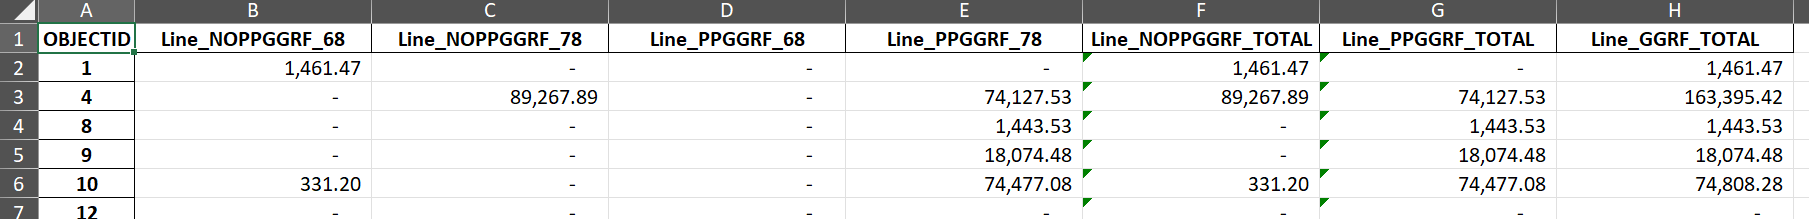

= CONCATENATE("Line_NOPPGGRF_",B2)

= CONCATENATE("Line_PPGGRF_",D2)

Create three new datafields for the subtotals and grand total:

* Sum of No Total: “Line_NOPPGGRF_TOTAL” (=SUM(B3:C3))
* Sum of Yes Total: “Line_PPGGRF_TOTAL” (=SUM(D3:E3))
* Sum of TOTAL_GGRF_FUNDING: “Line_GGRF_TOTAL” (=SUM(F3:G3))

First Column: “OBJECTID”

Data Columns: “Line_PPGGRF_XX”

Name the worksheet "4GIS"

<b>Save the Excel file as "Line_DataPiv4GIS_{suffix}.xlsx"</b>

In [87]:
# Perform Excel to Table function to be able to join the line data you just saved in Excel 

# Define the input excel file location 
JoinLineData_xlsx = os.path.join(directory, f"Line_DataPiv4GIS_{suffix}.xlsx")

# Define the target table in the project geodatabase that you would like to write the excel file to
JoinLineData = os.path.join(project_gdb, f"Line_DataPiv4GIS_{suffix}")

arcpy.conversion.ExcelToTable(JoinLineData_xlsx, JoinLineData, "4GIS", 1, '')

print(f"Summarized Line Data has been saved to geodatabase table {JoinLineData}")

Summarized Line Data has been saved to geodatabase table C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\2024_FundingDistribution.gdb\Line_DataPiv4GIS_AR24


### Summarize Line Data Within Priority Population Boundaries

In [17]:
#Join the line data to the priority population boundary layer
ctpolyptline_joined_table = arcpy.management.AddJoin(
    CES4_ctpolyptData,
    "OBJECTID",
    JoinLineData,
    "OBJECTID",
    "KEEP_ALL")

# Define the target feature class path in the project geodatabase where you would like to export features
CES4_ctpolyptlineData = os.path.join(project_gdb, f"CES4PP_ctpolyptline{suffix}")

# Export the features as a new feature class
arcpy.management.CopyFeatures(ctpolyptline_joined_table, CES4_ctpolyptlineData)

print(f"Exported selected features to: {CES4_ctpolyptlineData}")

# In AR24, this resulted in polygon data joined to 5,686 of the priority population boundaries

Exported selected features to: C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\2024_FundingDistribution.gdb\CES4PP_ctpolyptlineAR24


### Remove "OBJECTID" duplicate data fields

Open the attribute table of "CES4PP_ctpolyptline{suffix}" and right click on the duplicate data field "OBJECTID" and select "delete"

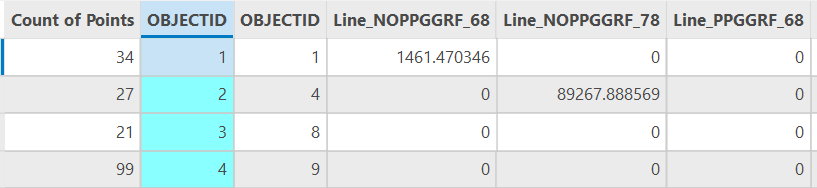

### Final Data Field Name Clean Up

In [18]:
# Clean up data field names for line data fields

#Delete OBJECTID duplicate field manually
oldname = f"Line_DataPiv4GIS_{suffix}_OBJECTID_1"
newname = "Line_OBJECTID"

# Define input and output
input_fc = os.path.join(project_gdb, f"CES4PP_ctpolyptline{suffix}")
output_fc = os.path.join(project_gdb, f"CES4PP_ctpolyptline{suffix}_v2")

# List all fields of the resulting joined table
fields = arcpy.ListFields(input_fc)

# Rename the OBJECTID fields to avoid duplicate field names
for field in fields:
    # Check if the field name has the prefix from the joined table names
    if field.name == oldname:
        # Rename the field
        arcpy.management.AlterField(input_fc, field.name, newname)
        
# Save the result to a new feature class
arcpy.management.CopyFeatures(input_fc, output_fc)

<Result 'C:\\Users\\kecraig\\Documents\\ArcGIS\\Projects\\2024_FundingDistribution\\2024_FundingDistribution.gdb\\CES4PP_ctpolyptlineAR24_v2'>

In [20]:
# Define input and output
input_fc = os.path.join(project_gdb, f"CES4PP_ctpolyptline{suffix}_v2")
output_fc = os.path.join(project_gdb, f"CES4PP_ctpolyptline{suffix}_v3")
prefix = f"Line_DataPiv4GIS_{suffix}_"

# List all fields of the resulting joined table
fields = arcpy.ListFields(input_fc)

# Rename the fields to remove the prefix
for field in fields:
    # Check if the field name has the prefix from the joined table names
    if field.name.startswith(prefix):
        # Generate the new field name by removing the prefix
        new_name = field.name[len(prefix):]  # Remove the prefix
        # Rename the field
        arcpy.management.AlterField(input_fc, field.name, new_name)

# Save the result to a new feature class
arcpy.management.CopyFeatures(input_fc, output_fc)

# Delete intermediary layer
arcpy.management.Delete(input_fc)

<Result 'true'>

In [21]:
# Define input and output
input_fc = os.path.join(project_gdb, f"CES4PP_ctpolyptline{suffix}_v3")
output_fc = os.path.join(project_gdb, f"FundingDistribution_{suffix}")
prefix = f"CES4PP_ctpolypt{suffix}_"

# List all fields of the cleaned table
fields = arcpy.ListFields(input_fc)

# Rename the fields to remove the prefix
for field in fields:
    # Check if the field name has the prefix from the joined table names
    if field.name.startswith(prefix):
        # Generate the new field name by removing the prefix
        new_name = field.name[len(prefix):]  # Remove the prefix
        # Rename the field
        arcpy.management.AlterField(input_fc, field.name, new_name)

# Save the result to a new feature class
arcpy.management.CopyFeatures(input_fc, output_fc)

# Delete intermediary layer
arcpy.management.Delete(input_fc)

<Result 'true'>

In [24]:
# Export data to Excel

FinalResults = os.path.join(project_gdb, f"FundingDistribution_{suffix}")

# Define the target feature class path in the project geodatabase where you would like to export features to
FundingDistribution_xlsx = f"{directory}\\FundingDistribution_{suffix}.xlsx"

# Export the data reported by census tract to Excel
arcpy.conversion.TableToExcel(FinalResults, FundingDistribution_xlsx,"NAME", "CODE")

print(f"Output has been saved to {FundingDistribution_xlsx}")

Output has been saved to C:\Users\kecraig\Documents\ArcGIS\Projects\2024_FundingDistribution\FundingDistribution_AR24.xlsx


## Final Step. Verify Spatial Data Preparation Accuracy

Check the sum of the resulting data prior to finalizing.

The sum of the data should be within an acceptable margin of error (e.g., <0.01%)

In [9]:
# Determine the sum of the polygon data reported by census tract

Polygon_ctResults_xlsx = f"{directory}\\Polygon_ctDataPiv4GIS_{suffix}.xlsx"

Polygon_ctResults_df = pd.read_excel(Polygon_ctResults_xlsx)
CTSum = Polygon_ctResults_df["CT_GGRF_TOTAL"].sum()

print(f"Sum of Data Reported by Census Tract: {CTSum}")

Sum of Data Reported by Census Tract: 1435982579


In [8]:
# Determine the sum of the polygon data not reported by census tract

Polygon_noctResults_xlsx = f"{directory}\\Polygon_noctDataPiv4GIS_{suffix}.xlsx"

Polygon_noctResults_df = pd.read_excel(Polygon_noctResults_xlsx)
PolygonSum = Polygon_noctResults_df["Poly_GGRF_TOTAL"].sum()

print(f"Sum of Data Reported by Polygon: {PolygonSum}")

Sum of Data Reported by Polygon: 78623315.0


In [122]:
# Determine the sum of the line data

Line_Data_xlsx = f"{directory}\\Line_DataPiv4GIS_{suffix}.xlsx"

Line_Data_df = pd.read_excel(Line_Data_xlsx)
LineSum = Line_Data_df["Line_GGRF_TOTAL"].sum()

print(f"Sum of Data Reported by Line: {LineSum}")

Sum of Data Reported by Line: 259291471.0


In [130]:
# Determine the sum of the point data

Pt_ctpolyData_xlsx = f"{directory}\\Point_DataPiv4GIS_{suffix}.xlsx"

Point_Data_df = pd.read_excel(Pt_ctpolyData_xlsx)
PointSum = Point_Data_QC_df["Point_GGRF_TOTAL"].sum()

print(f"Sum of Data Reported by Point: {PointSum}")

Sum of Data Reported by Point: 9245775677.0


In [131]:
# Compare the sum of the data prepared from the .gdb to the known total from CCIRTS

cci_data_df = pd.read_excel(cci_data, sheet_name="Project List")
CCISum = cci_data_df["Total Program GGRFFunding"].sum()

FDSum = CTSum + PolygonSum + LineSum + PointSum

print(f"Sum of Data Reported in CCIRTS: {CCISum}")
print(f"Sum of Data in Funding Distribution Results: {FDSum}")

Sum of Data Reported in CCIRTS: 11019673042
Sum of Data in Funding Distribution Results: 11019673042.0


In [132]:
Diff = (CCISum - FDSum)
PercentDiff = (CCISum - FDSum)/CCISum*100

print(f"The difference is {Diff} ({PercentDiff}%)") 

The difference is 0.0 (0.0%)


### If there is a difference found:

Create a pivot table of the sum of the GGRF Total by subprogram from CCIRTS.

Create pivot tables to sum GGRF Total by subprogram from each "...Data4Piv..." excel file, for each spatial data type. 

Use VLOOKUP formulas to compare the subprogram totals reported in CCIRTS to the subprogram totals from each spatial data type.

Calculate the difference between the data reported to CCIRTS and the total from the spatial data files to locate the subprogram where there is an error.

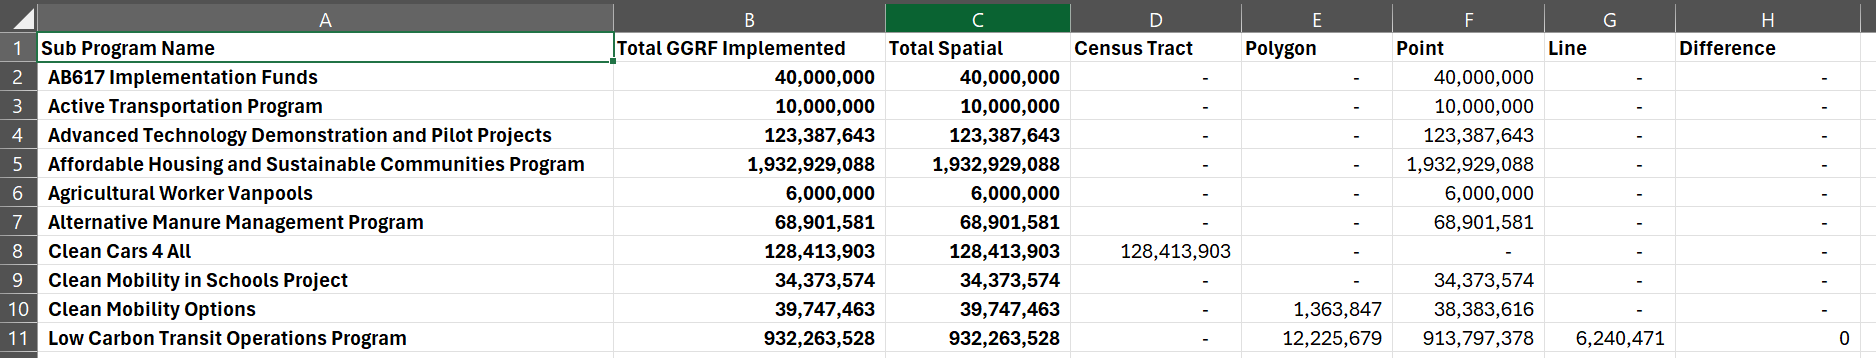

Errors can be cause by the CCIRTS ETL process if the data differentiating different CCIRTS data entries is not retained in the spatial data (e.g., unique ID is located in the "voucher ID" data field, which is not retained in the spatial dataset).  

To identify and address these errors, create a similar summary of the data for the affected program, to identify the project ID of concern.  Edit the data handling for that project ID in the applicable "Prepare the ___ Data in Excel for Summary" steps above and save for future reference.

In [30]:
# One last final QC to identify any data not retained in the final output

# Final Output File
FinalResults_df = pd.read_excel(FundingDistribution_xlsx)

# Find the sum of GGRF by spatial data type
FinalCTSum = FinalResults_df["CT_GGRF_TOTAL"].sum()
FinalPolySum = FinalResults_df["Poly_GGRF_TOTAL"].sum()
FinalPointSum = FinalResults_df["point_ggrf_total"].sum()
FinalLineSum = FinalResults_df["Line_GGRF_TOTAL"].sum()

FinalSum = FinalCTSum + FinalPolySum + FinalPointSum + FinalLineSum

# Find the difference between the final results and data inputs

CTDiff = CTSum - FinalCTSum
PolyDiff = PolySum - FinalPolySum
PointDiff = PointSum - FinalPointSum
LineDiff = LineSum - FinalLineSum

print(f"The difference between CT inputs and result is: {CTDiff}")
print(f"The difference between polygon inputs and result is: {PolyDiff}")
print(f"The difference between point inputs and result is: {PointDiff}")
print(f"The difference between line inputs and result is:: {LineDiff}")
print("----------")
print(f"Sum of Data in Spatial Analysis: {FinalSum}")
print(f"Sum of Data in CCIRTS: {CCISum}")

Diff = (CCISum - FinalSum)
PercentDiff = (CCISum - FinalSum)/CCISum*100

print(f"The difference is {Diff} ({PercentDiff}%)") 

The difference between CT inputs and result is: 239500.0
The difference between polygon inputs and result is: 0.0
The difference between point inputs and result is: 7646639.139667511
The difference between line inputs and result is:: -2.9802322387695312e-08
----------
Sum of Data in Spatial Analysis: 11011786902.860332
Sum of Data in CCIRTS: 11019673042
The difference is 7886139.139667511 (0.07156418443279174%)
